In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# EDA

In [4]:
df.shape

(4177, 9)

In [5]:
df.rename(columns = {'Rings':'Age'}, inplace = True)

In [6]:
df['Age'] += 1.5

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [8]:
df['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

In [9]:
# regression problem

In [10]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [11]:
df['Sex'].head()

0    M
1    M
2    F
3    M
4    I
Name: Sex, dtype: object

In [12]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [13]:
from sklearn import preprocessing

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df['Sex'] = le.fit_transform(df['Sex'])

In [16]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [17]:
df.dtypes

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

In [18]:
# so convert numeric encoding so proceed data set

In [19]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [20]:
#no null values proceed steps

In [21]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [22]:
# data visulazation

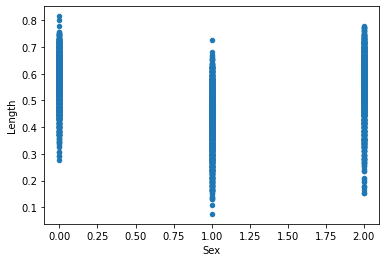

In [23]:
df.plot(kind='scatter',x='Sex',y='Length');
plt.show()

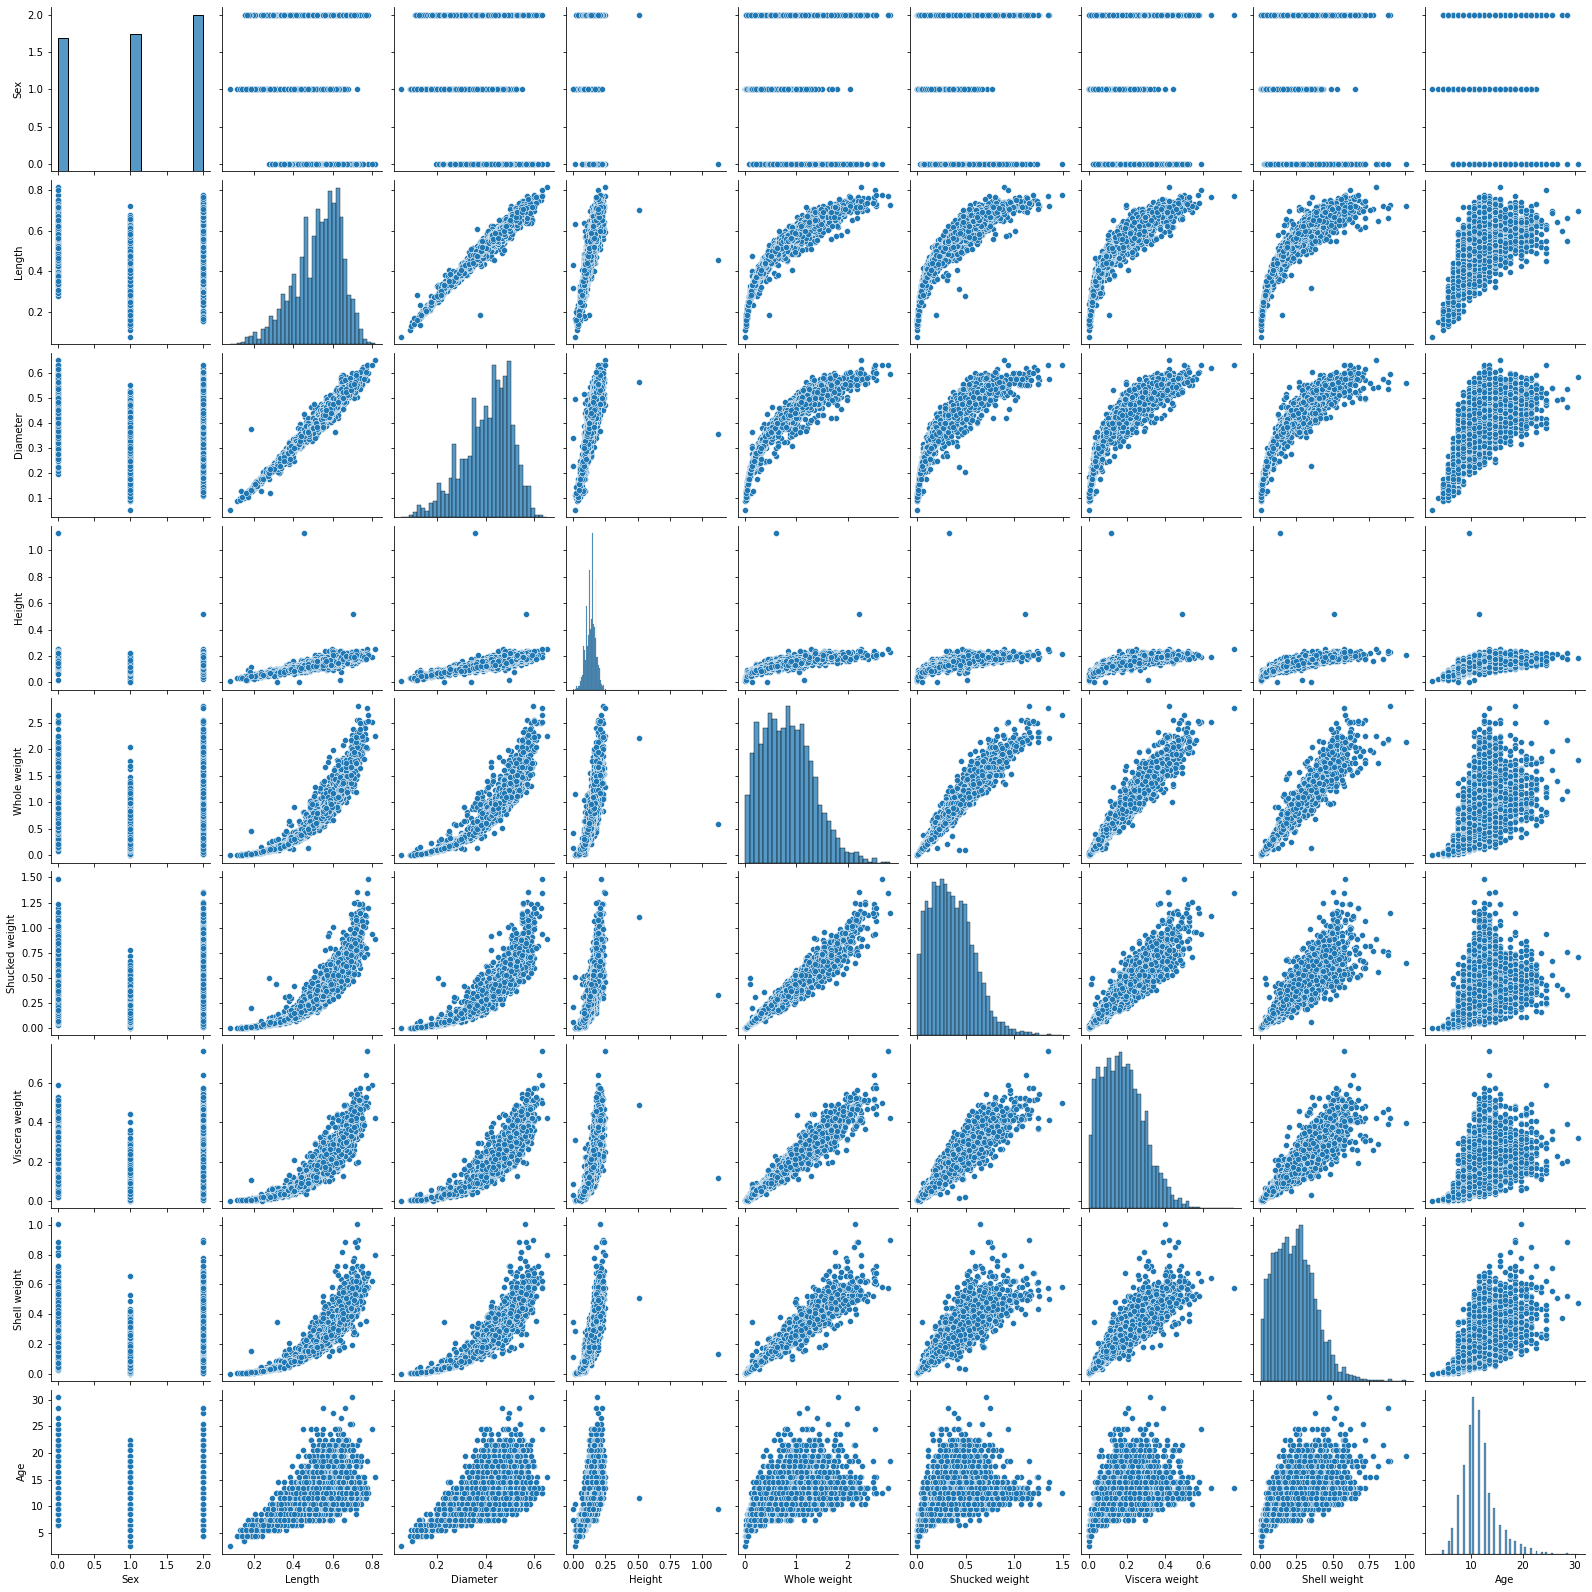

In [24]:
sns.pairplot(df)

In [25]:
corr_mat = df.corr()
corr_mat

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


[]

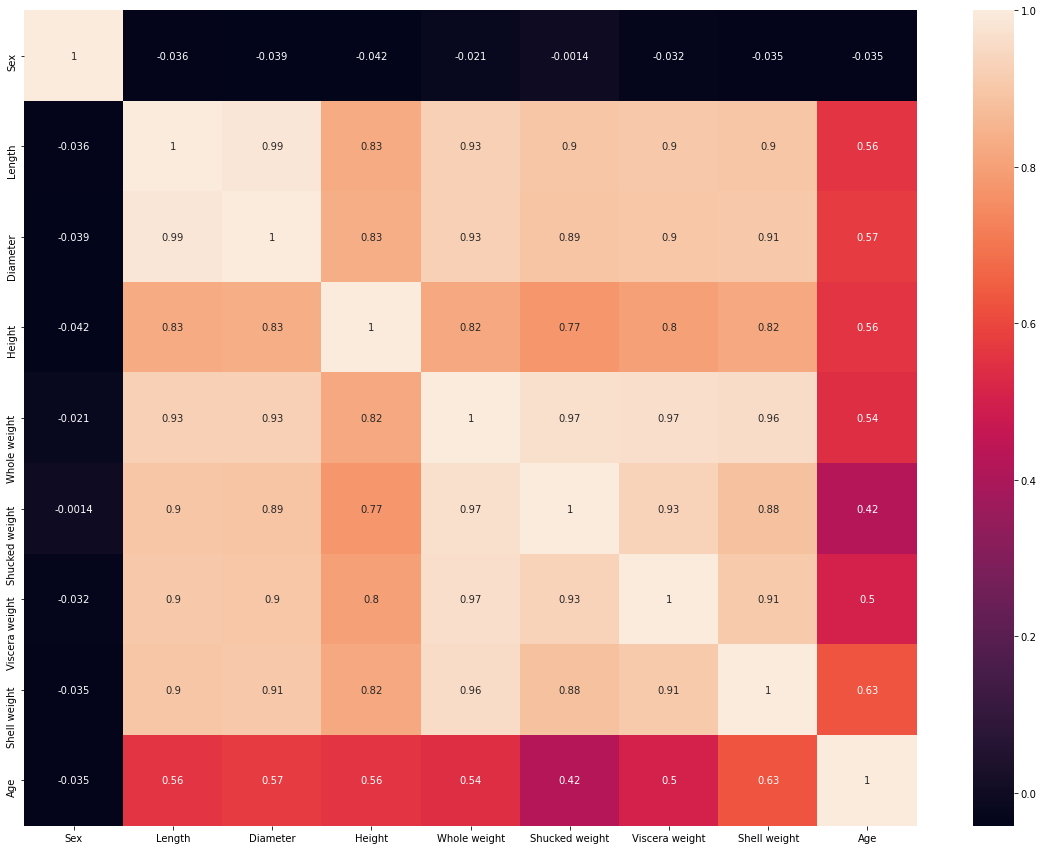

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot()

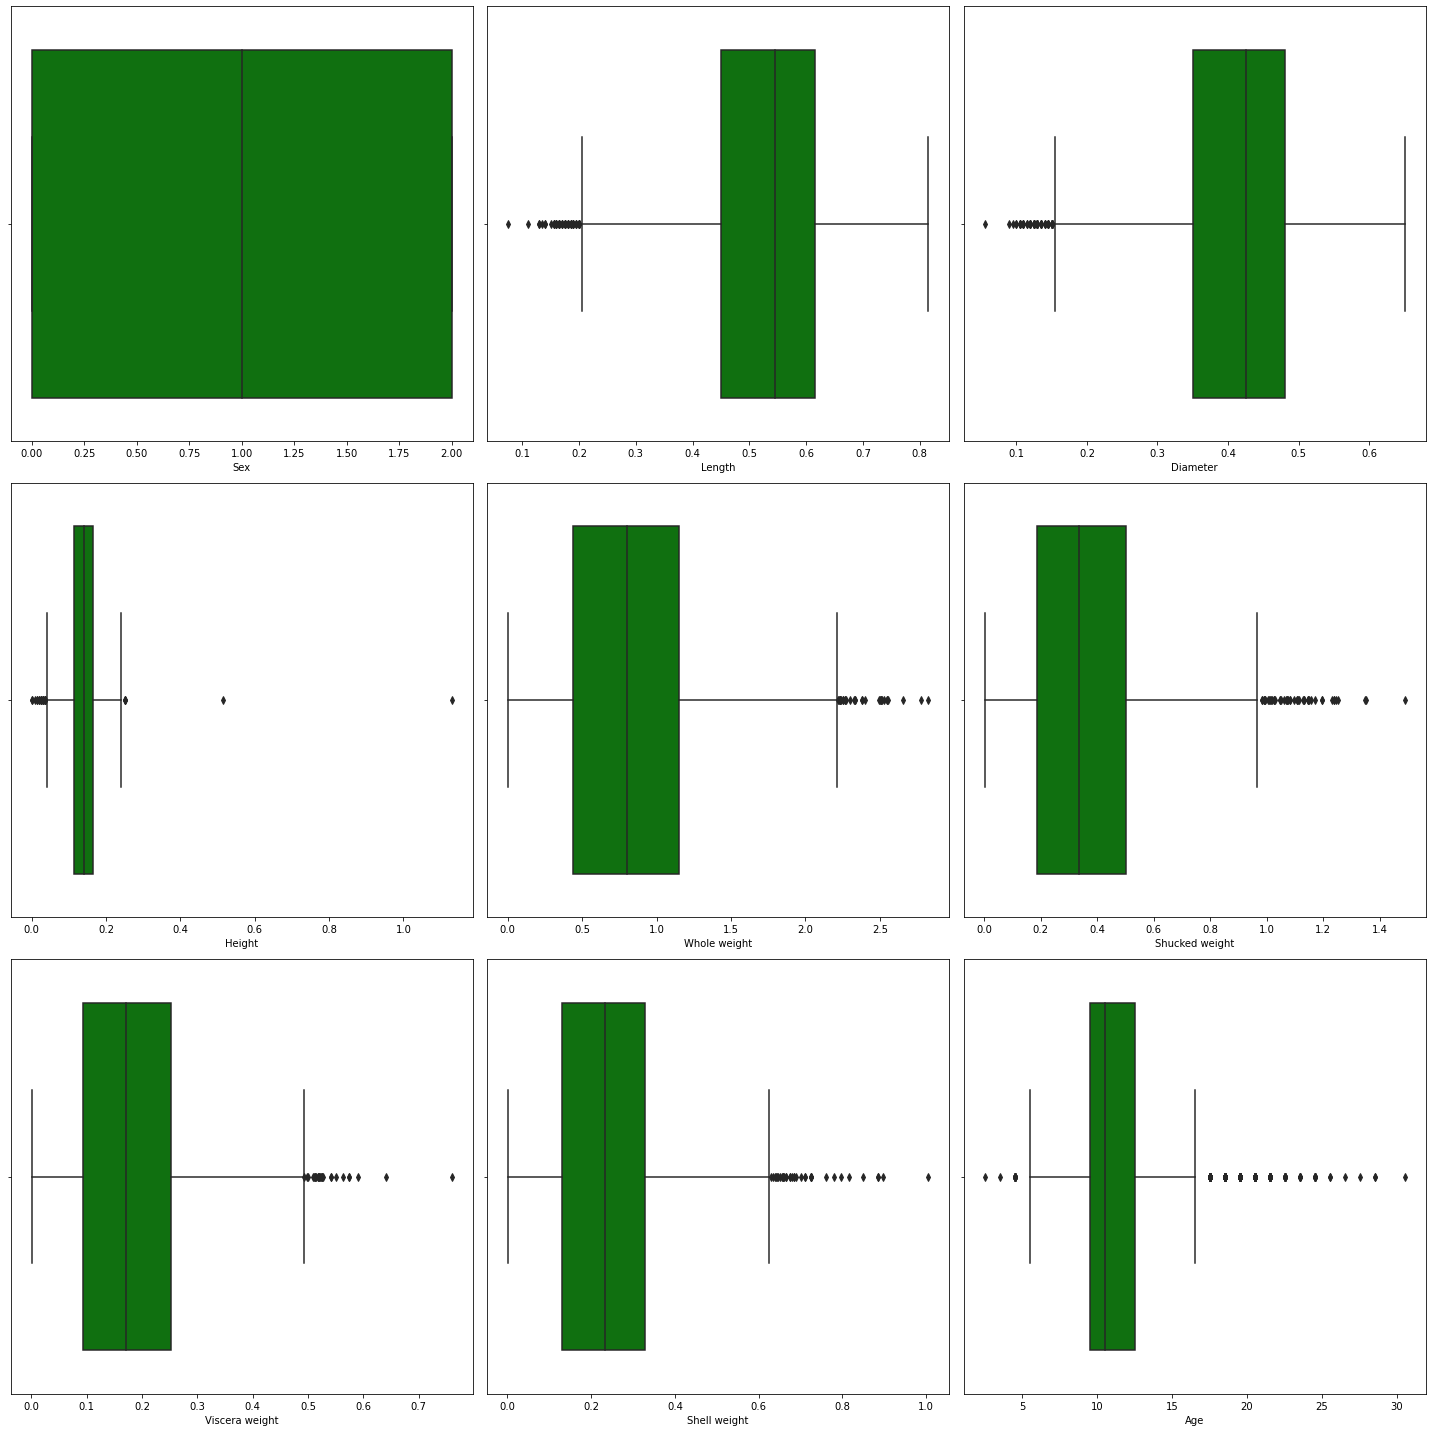

In [27]:
collist=df.columns.values
ncol=3
nrows=3
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [28]:
# outliers are there so remove outliers

In [29]:
dfCountCols = df[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']]

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

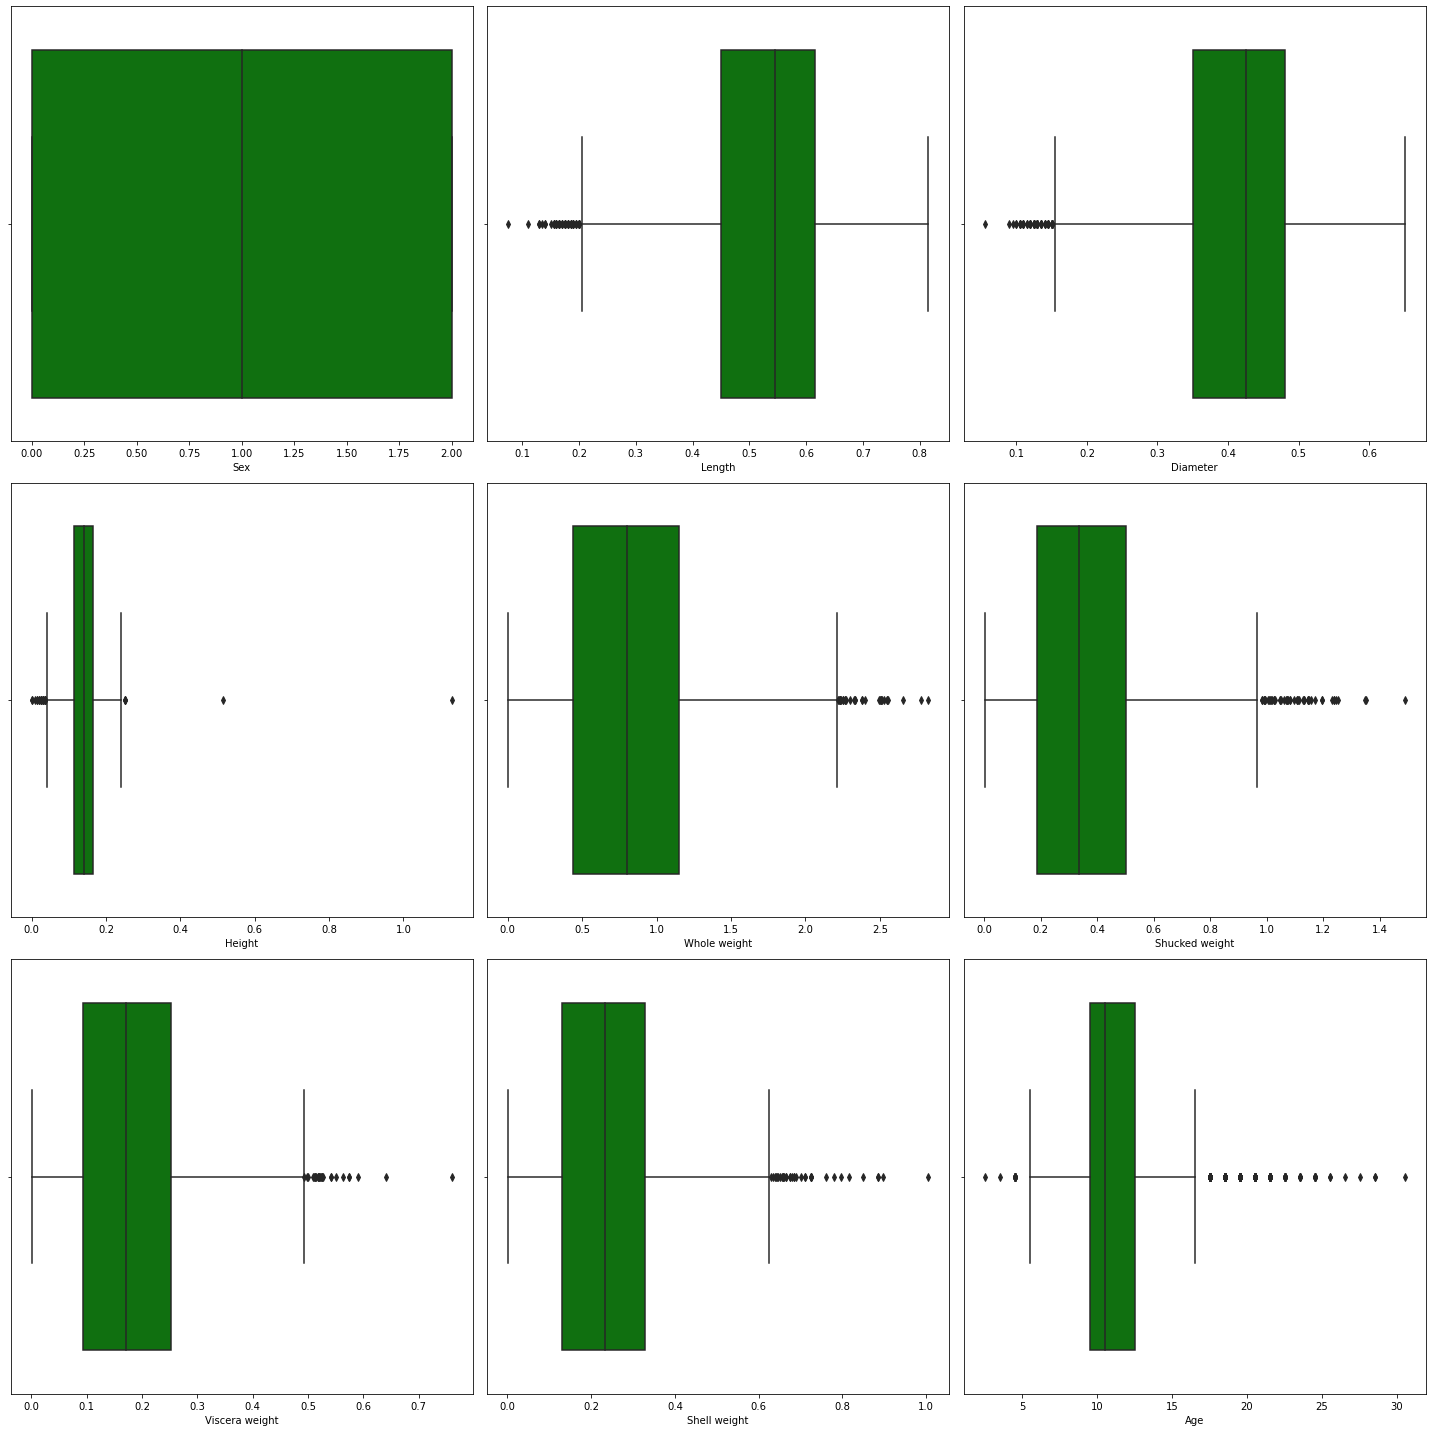

In [31]:
collist=df.columns.values
ncol=3
nrows=3
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [32]:
print('percentage Loss'.ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

percentage Loss      : 0.022264783337323436


In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

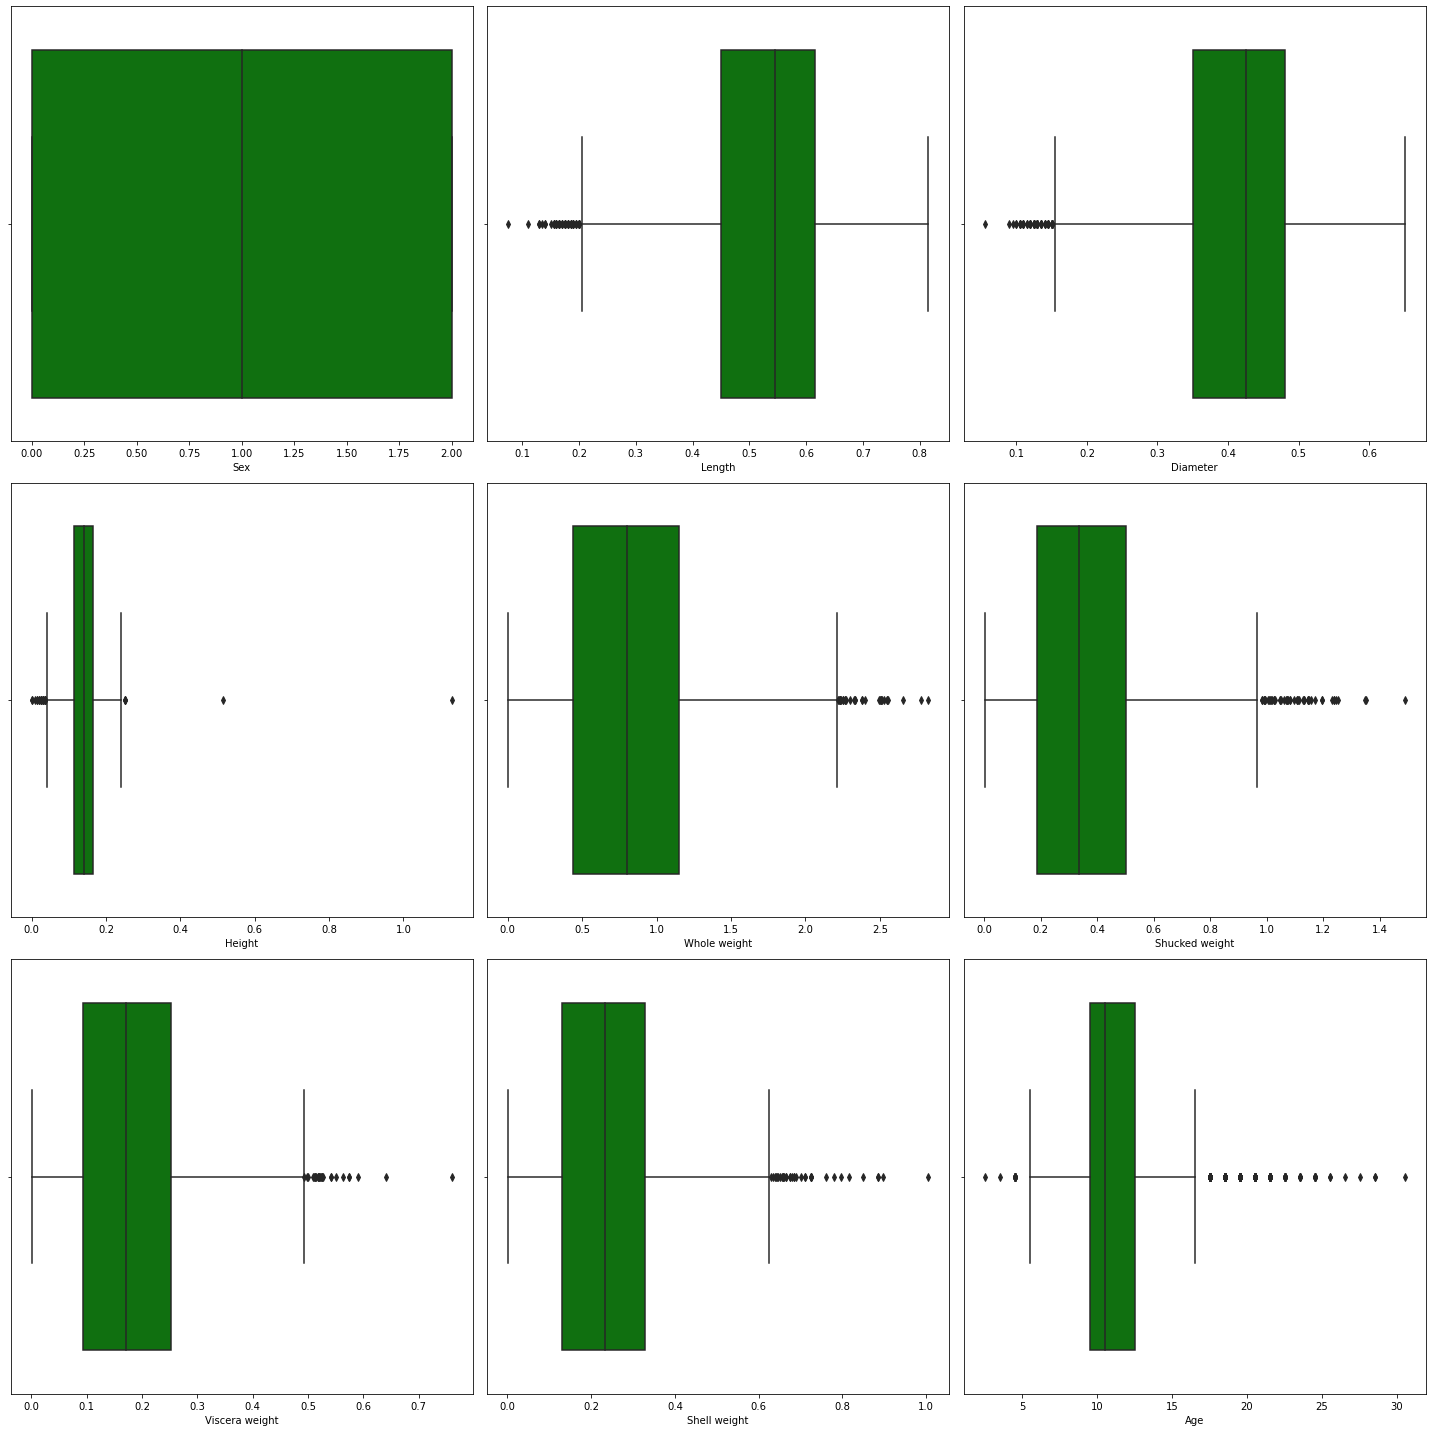

In [34]:
collist=df.columns.values
ncol=3
nrows=3
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [37]:
print('percentage Loss'.ljust(20),":",(df.shape[0]-df_new.shape[0])/df.shape[0])

percentage Loss      : 0.09480488388795787


In [49]:
# split the data indepdent and target variable

In [60]:
x= df.drop('Age',axis=1)
y=df['Age']

In [61]:
x.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
dtype: float64

In [62]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [63]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [64]:
df_new.skew()

Sex              -0.176442
Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
dtype: float64

In [65]:
# skewness remove proceed ml algorthims

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [91]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.29,random_state=38)

In [93]:
lr=LinearRegression()
kn=KNeighborsRegressor()
sv=SVR()

In [95]:
lr.fit(x_train,y_train)
y_pred =lr.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(lr,x,y,cv=5).mean())

r2 score 0.5500780591125853
1.5602552564943095
4.605010534127899
0.3980361557787404


In [97]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(kn,x,y,cv=5).mean())




r2 score 0.5272189147922863
1.547029702970297
4.838976897689769
0.42710431477074684


In [100]:
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(sv,x,y,cv=5).mean())

r2 score 0.5625774781439992
1.4247343362510632
4.4770773282108705
0.44004078402452357


In [101]:
# so diffierence r2 score cv so  select best model

In [102]:
# so best model kn regressor model

In [103]:
# so hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
grid_param = {'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'n_neighbors':[2,5,8,6,12,18,],
              'leaf_size':[6,8,3,16,],
              'n_jobs':[4,8,3,8,]}

grid_search = GridSearchCV(estimator=kn,param_grid=grid_param,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [6, 8, 3, 16], 'n_jobs': [4, 8, 3, 8],
                         'n_neighbors': [2, 5, 8, 6, 12, 18],
                         'weights': ['uniform', 'distance']})

In [106]:
grid_search.best_params_

{'algorithm': 'brute',
 'leaf_size': 6,
 'n_jobs': 4,
 'n_neighbors': 18,
 'weights': 'distance'}

In [107]:
mod = KNeighborsRegressor(algorithm='brute',leaf_size=6,n_jobs=4,n_neighbors=18,weights='distance')
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2*100)

54.55176384539945


In [108]:
# save the model

In [109]:
import joblib
joblib.dump(mod,'abalone.pkl')

['abalone.pkl']